# AE_3D_200_leaky

* In this I have changed the model a little to change the activation function between layer 2 and layer 3 from __tanh to leakyReLU__
* I have noticed that I got ___better results___ compared to tanh function in my case. Comparision is in the presentation.

In [1]:
%matplotlib inline
import sys
BIN = '../'
sys.path.append(BIN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
#import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import my_matplotlib_style as ms

from fastai import data_block, basic_train, basic_data
from fastai.callbacks import ActivationStats
import fastai

import matplotlib as mpl
mpl.rc_file(BIN + 'my_matplotlib_rcparams')


In [2]:
from nn_utils import AE_big, AE_3D_200, AE_3D_200_leaky #Leaky ReLU
from utils import plot_activations

In [3]:
torch.cuda.is_available()

False

In [4]:
#fastai.torch_core.defaults.device = 'cuda'

In [5]:
# Load data
train = pd.read_pickle(BIN + 'processed_data/all_jets_train_4D_100_percent.pkl')
test = pd.read_pickle(BIN + 'processed_data/all_jets_test_4D_100_percent.pkl')
n_features = len(train.loc[0])

train.head(10)

,m,pt,phi,eta
132784,3831.839355,22000.609375,1.567018,1.142924
99666,4582.417480,21648.210938,-2.680558,0.213654
26629,16747.765625,169514.281250,-1.948239,1.163296
80473,14789.586914,183085.609375,-1.641102,2.670927
48229,4646.724121,20527.130859,2.922270,-1.158871
61832,6236.774414,30013.537109,-2.962712,0.091814
26867,17774.943359,205705.046875,2.472530,-1.299140
46232,4181.291992,20511.900391,-1.937396,-1.893408
44194,4537.854492,29095.220703,2.703056,-1.746550
59782,6769.761719,26334.353516,1.344461,-2.599911


In [6]:
# Normalize
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

train_x = train
test_x = test
train_y = train_x  # y = x since we are building and AE
test_y = test_x

# Explicit conversion to float
train_ds = TensorDataset(torch.tensor(train_x.values, dtype=torch.float), torch.tensor(train_y.values, dtype=torch.float))
valid_ds = TensorDataset(torch.tensor(test_x.values, dtype=torch.float), torch.tensor(test_y.values, dtype=torch.float))

In [7]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [8]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs=256)

In [9]:
db = basic_data.DataBunch(train_dl, valid_dl)

In [10]:
db

DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f16efffdf60>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f16efffdfd0>;

Test: None

In [11]:
model = AE_3D_200_leaky()

In [12]:
class RMSELoss(torch.nn.Module):
    def __init__(self):
        super(RMSELoss,self).__init__()

    def forward(self,x,y):
        criterion = nn.MSELoss()
        loss = torch.sqrt(criterion(x, y))
        return loss
loss_func = nn.MSELoss()
#loss_func = RMSELoss()
#loss_func = my_loss_func

In [13]:
bn_wd = False  # Don't use weight decay fpr batchnorm layers
true_wd = True  # wd will be used for all optimizers
wd = 1e-6
learn = basic_train.Learner(data=db, model=model, loss_func=loss_func, wd=wd, callback_fns=ActivationStats, bn_wd=bn_wd, true_wd=true_wd)

In [14]:
from fastai import train as tr
tr.lr_find(learn)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


## Better Loss compared original model

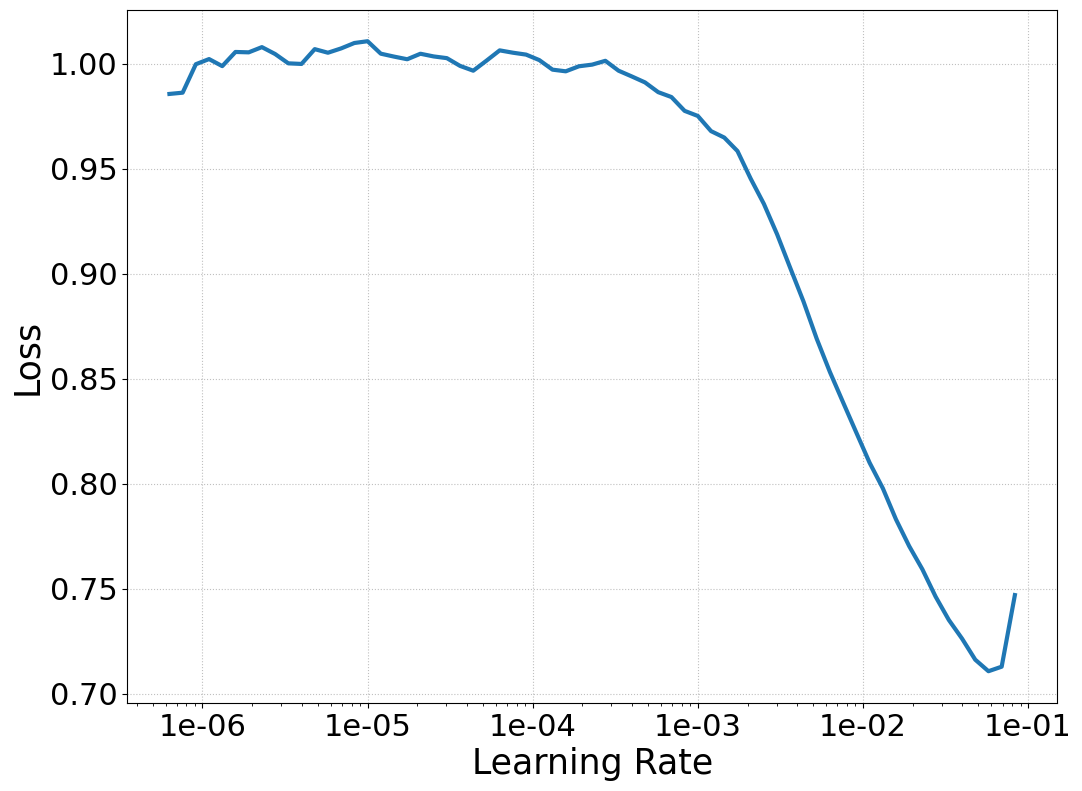

In [15]:
learn.recorder.plot()

In [16]:
lr = 1e-7
learn.fit(1, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,1.005236,1.017651,00:32


In [17]:
lr = 1e-4
learn.fit(10, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.043174,0.042197,00:38
1,0.031430,0.033051,00:36
2,0.029074,0.030906,00:37
3,0.028823,0.029684,00:19
4,0.027797,0.028712,00:08
5,0.026076,0.027566,00:08
6,0.025516,0.026242,00:08
7,0.022525,0.023694,00:07
8,0.022120,0.021965,00:07
9,0.021205,0.021352,00:07


## The training loss does not flat our in the case of Leaky ReLU case

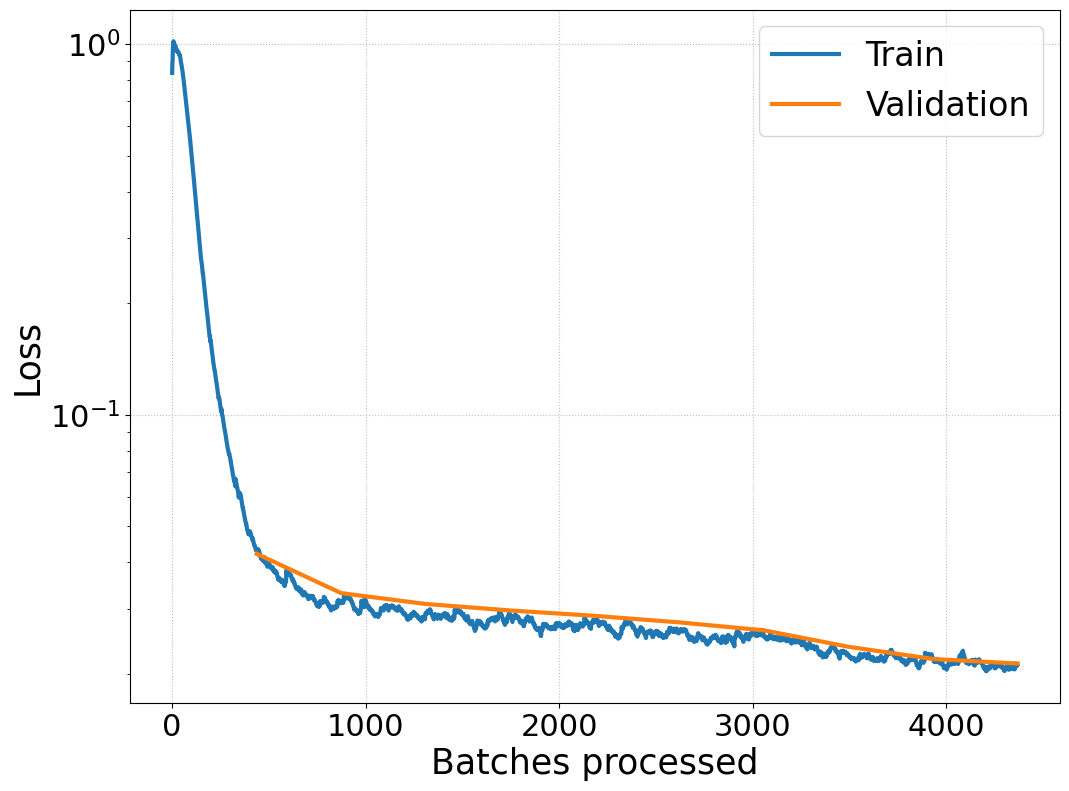

In [18]:
learn.recorder.plot_losses()
plt.yscale('log')

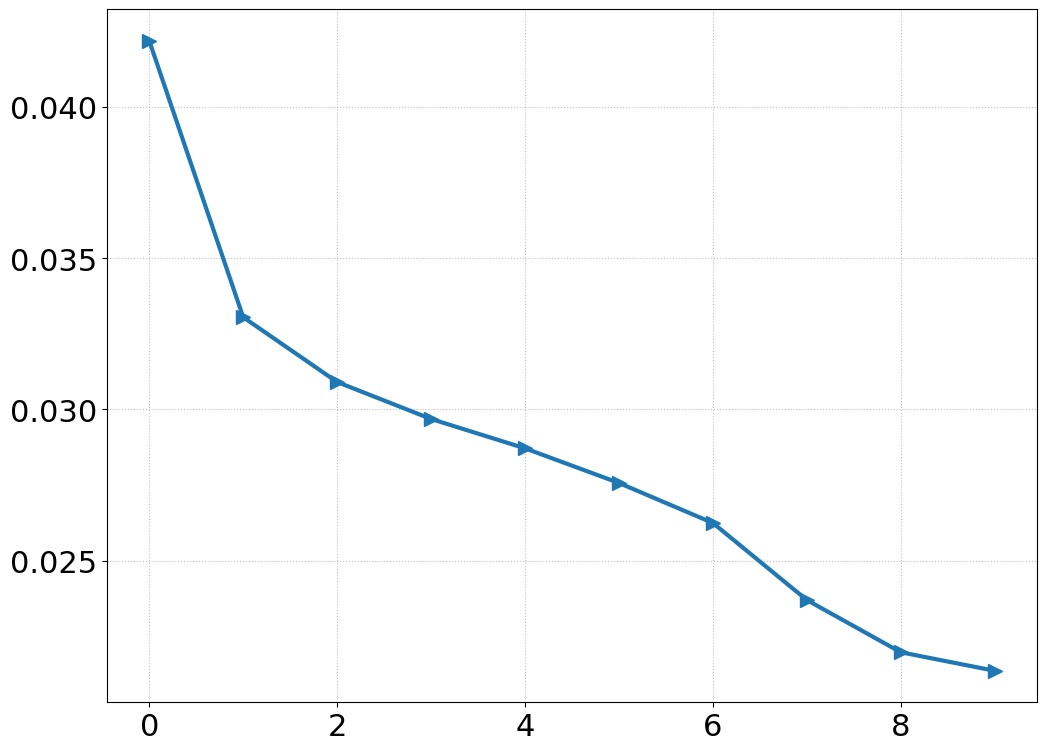

In [19]:
plt.plot(learn.recorder.val_losses, marker='>')

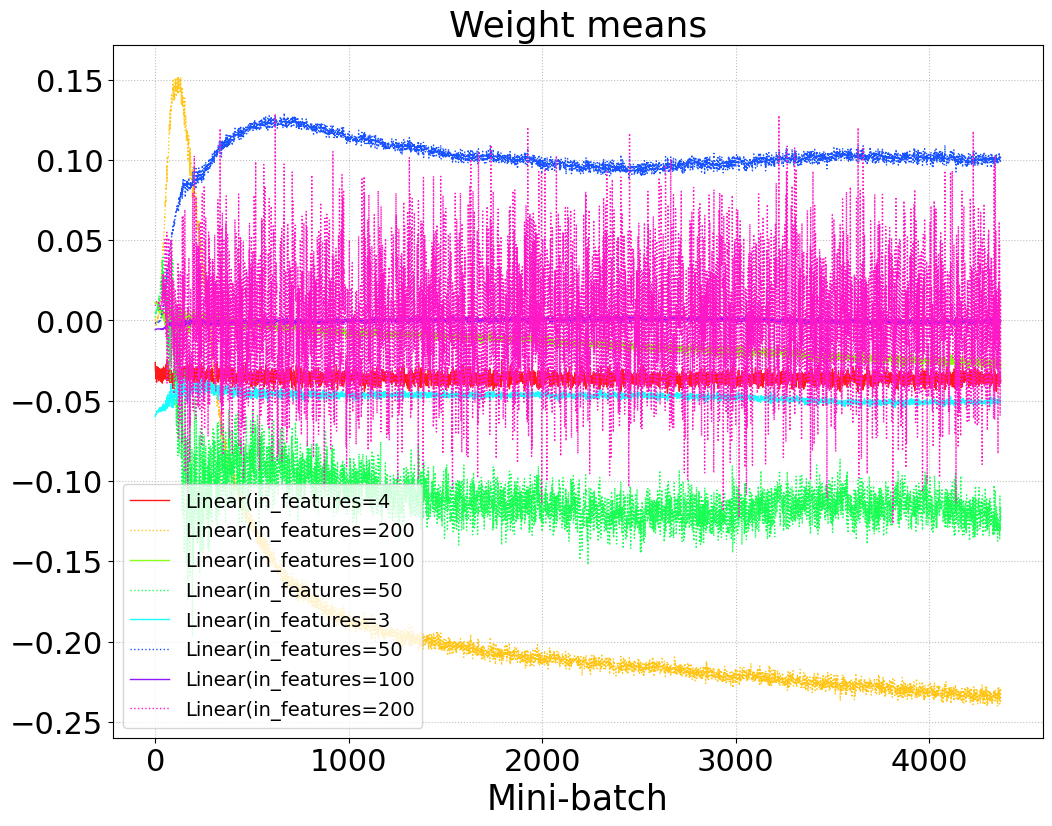

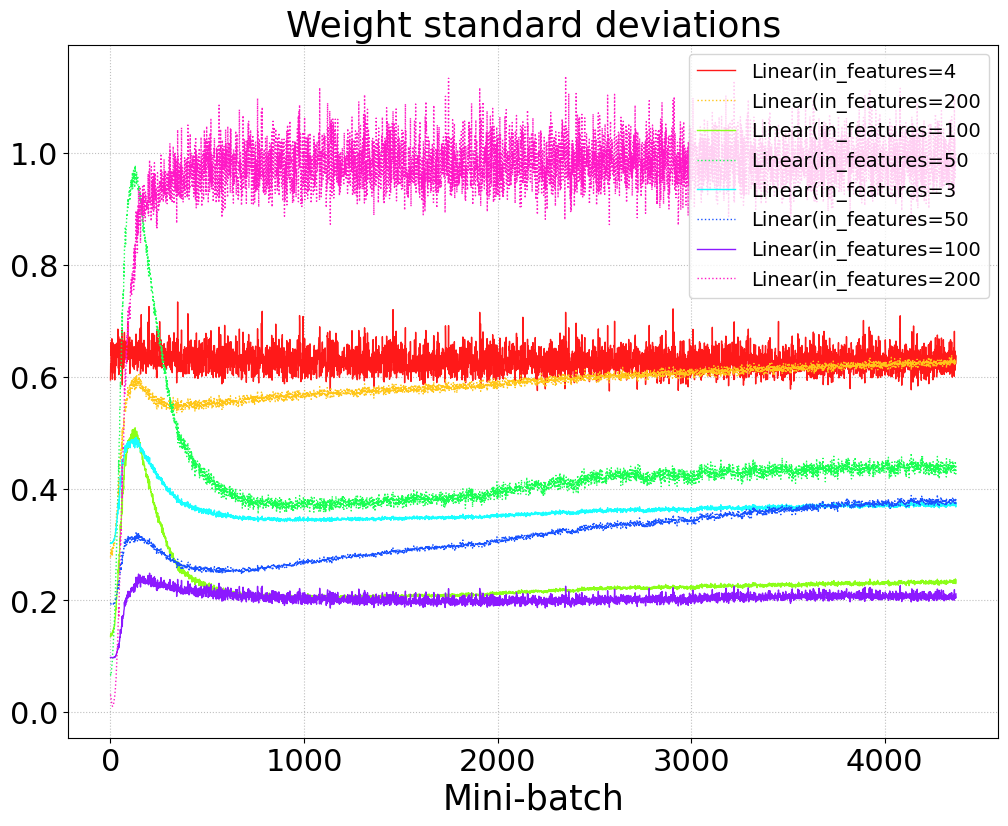

In [20]:
plot_activations(learn)

In [21]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.021294,0.020972,00:08
1,0.020521,0.020934,00:08
2,0.020280,0.020913,00:08
3,0.020376,0.020900,00:08
4,0.020044,0.020887,00:08
5,0.020634,0.020876,00:08
6,0.019937,0.020869,00:08
7,0.020411,0.020857,00:09
8,0.021179,0.020846,00:08
9,0.020508,0.020837,00:08


KeyboardInterrupt: 

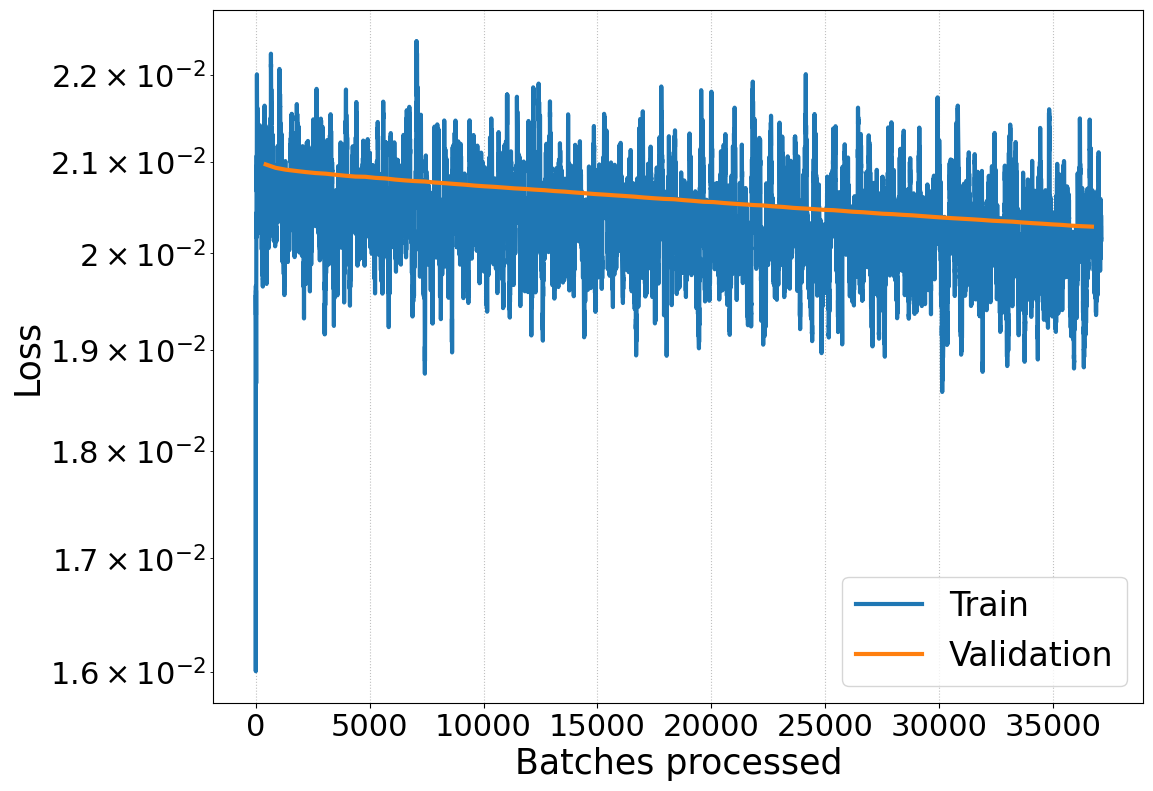

In [22]:
learn.recorder.plot_losses()
plt.yscale('log')

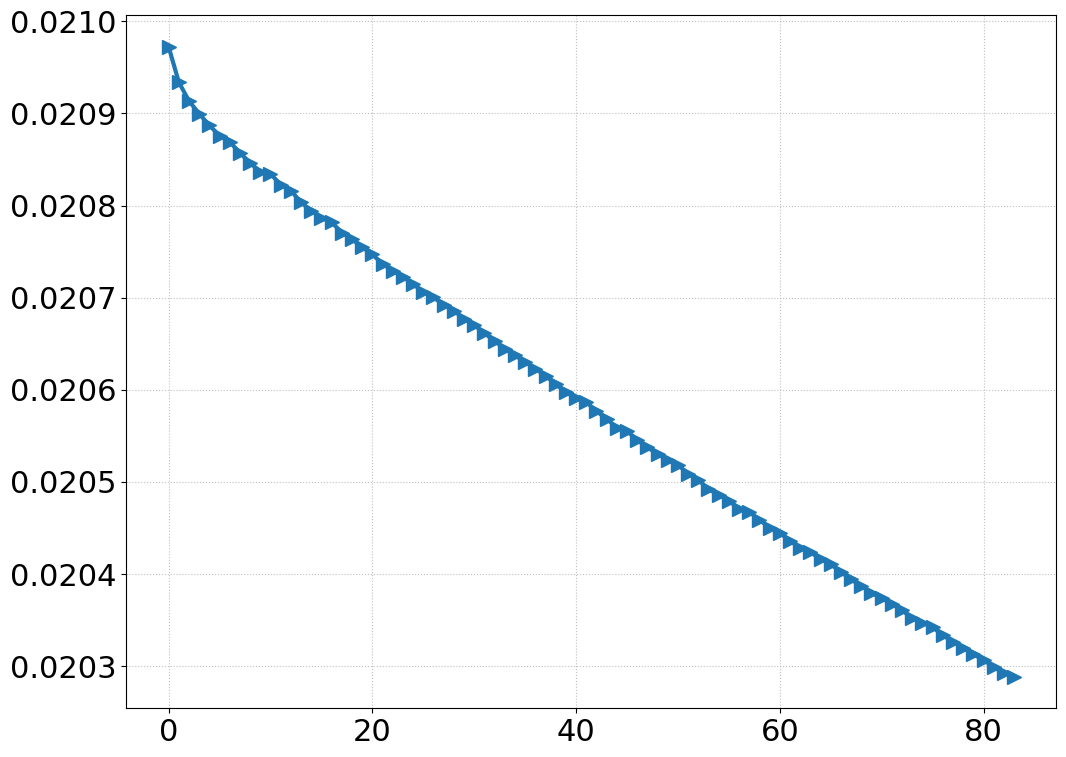

In [23]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [24]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.020017,0.020273,00:30
1,0.020589,0.020267,00:29
2,0.019393,0.020262,00:29
3,0.019564,0.020253,00:31
4,0.020349,0.020249,00:29
5,0.020073,0.020240,00:30
6,0.019409,0.020233,00:29
7,0.020370,0.020227,00:30
8,0.020350,0.020220,00:26
9,0.019628,0.020217,00:30


KeyboardInterrupt: 

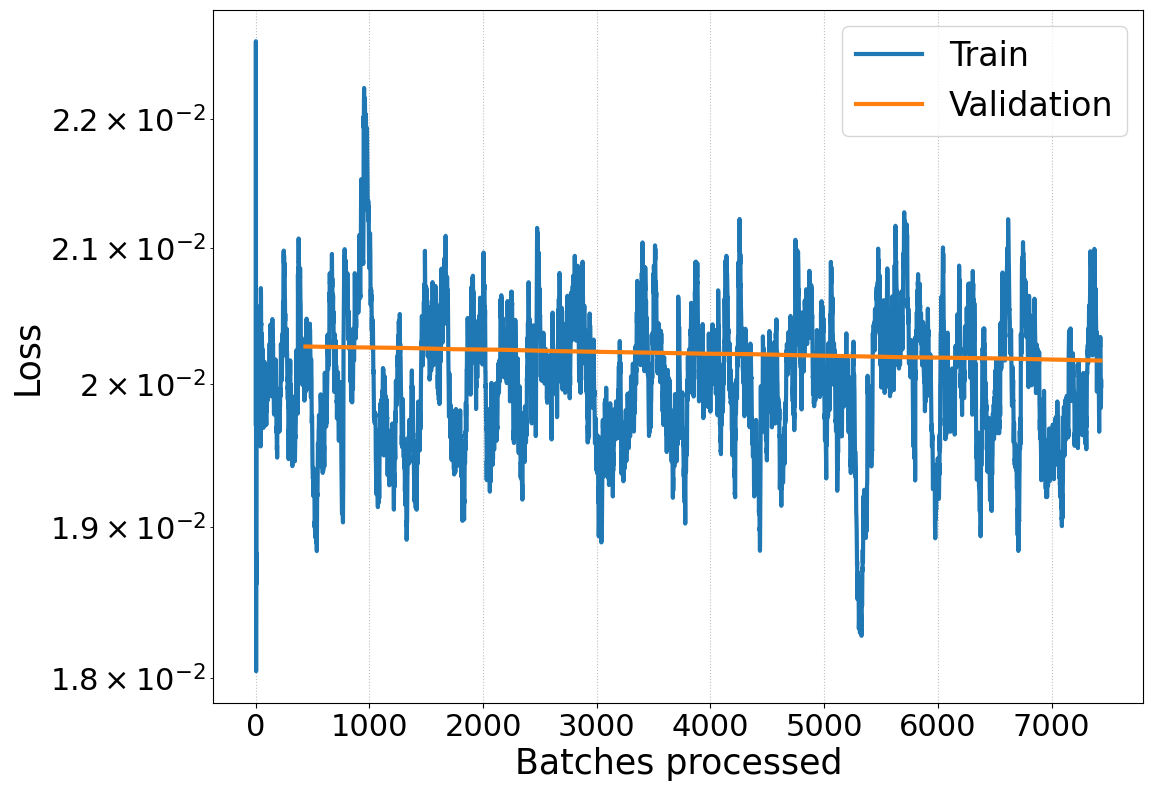

In [25]:
learn.recorder.plot_losses()
plt.yscale('log')

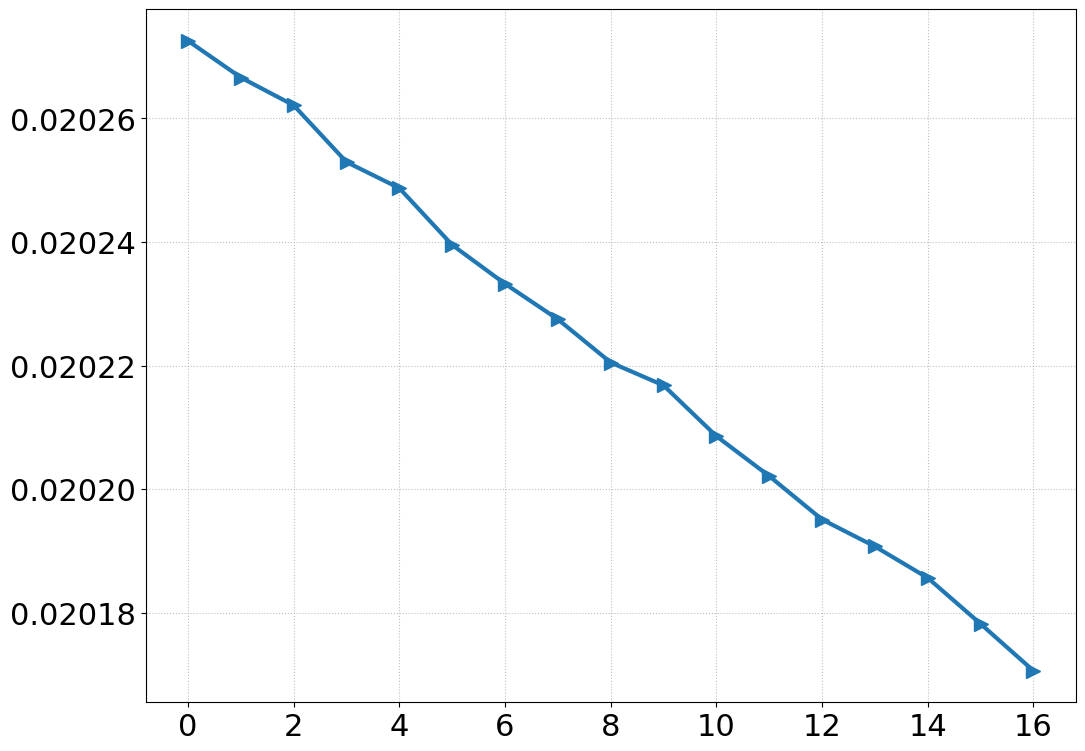

In [26]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [27]:
lr = 3e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.019614,0.020155,00:29
1,0.020157,0.020134,00:29
2,0.019362,0.020122,00:29
3,0.019920,0.020108,00:29
4,0.020400,0.020083,00:29
5,0.020112,0.020070,00:30
6,0.019577,0.020048,00:29
7,0.019813,0.020036,00:29
8,0.020674,0.020027,00:29
9,0.020158,0.019996,00:30


KeyboardInterrupt: 

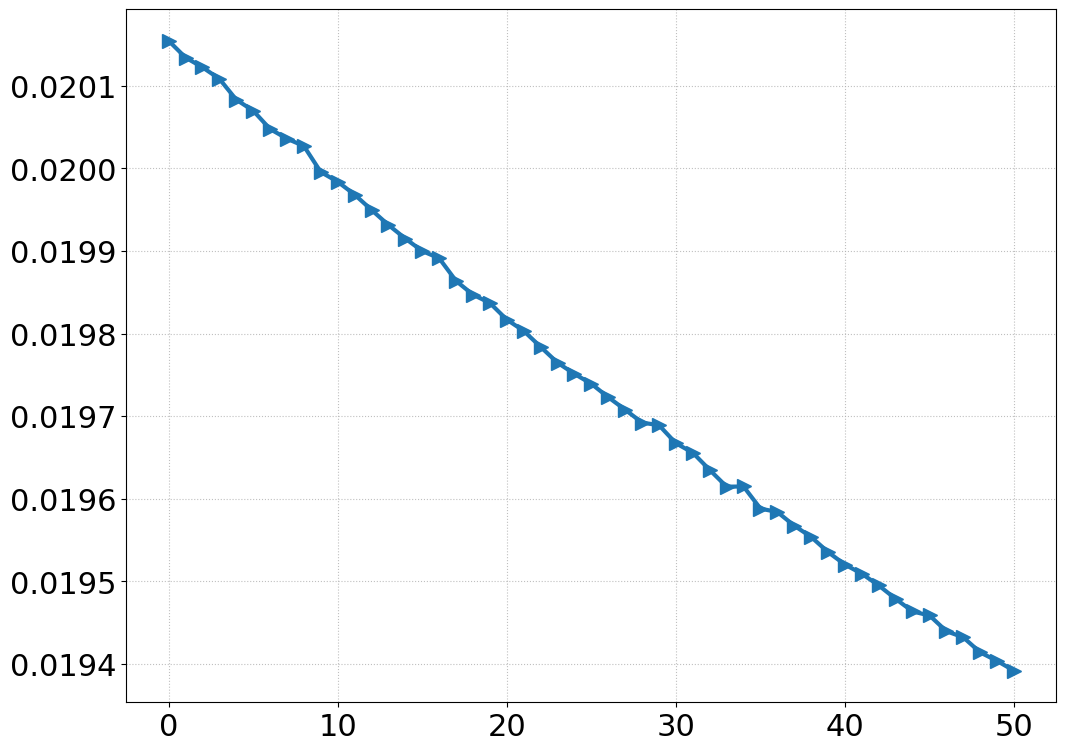

In [28]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [29]:
lr = 1e-6
learn.fit(35, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.019623,0.019374,00:29
1,0.019489,0.019373,00:37
2,0.019007,0.019367,00:38
3,0.019632,0.019363,00:34
4,0.019110,0.019359,00:35
5,0.018827,0.019353,00:32
6,0.019291,0.019349,00:31
7,0.019833,0.019346,00:30
8,0.019202,0.019344,00:30
9,0.019288,0.019339,00:29


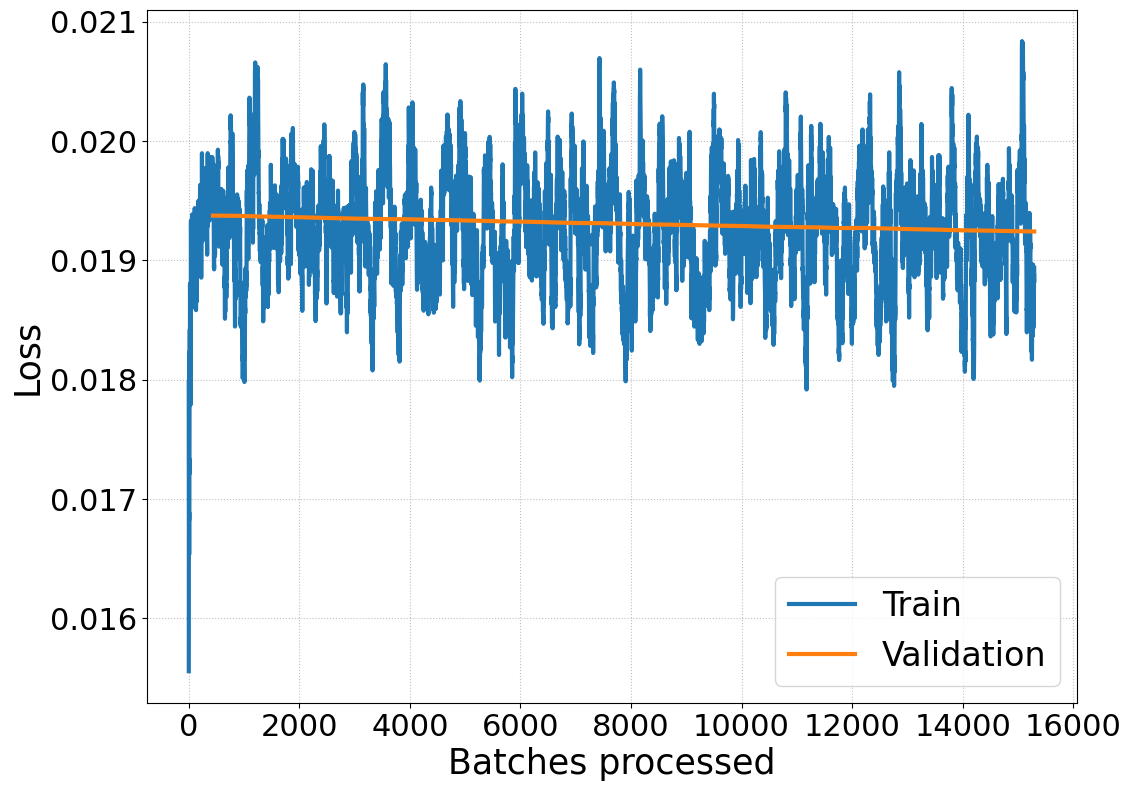

In [30]:
learn.recorder.plot_losses()
#plt.yscale('log')

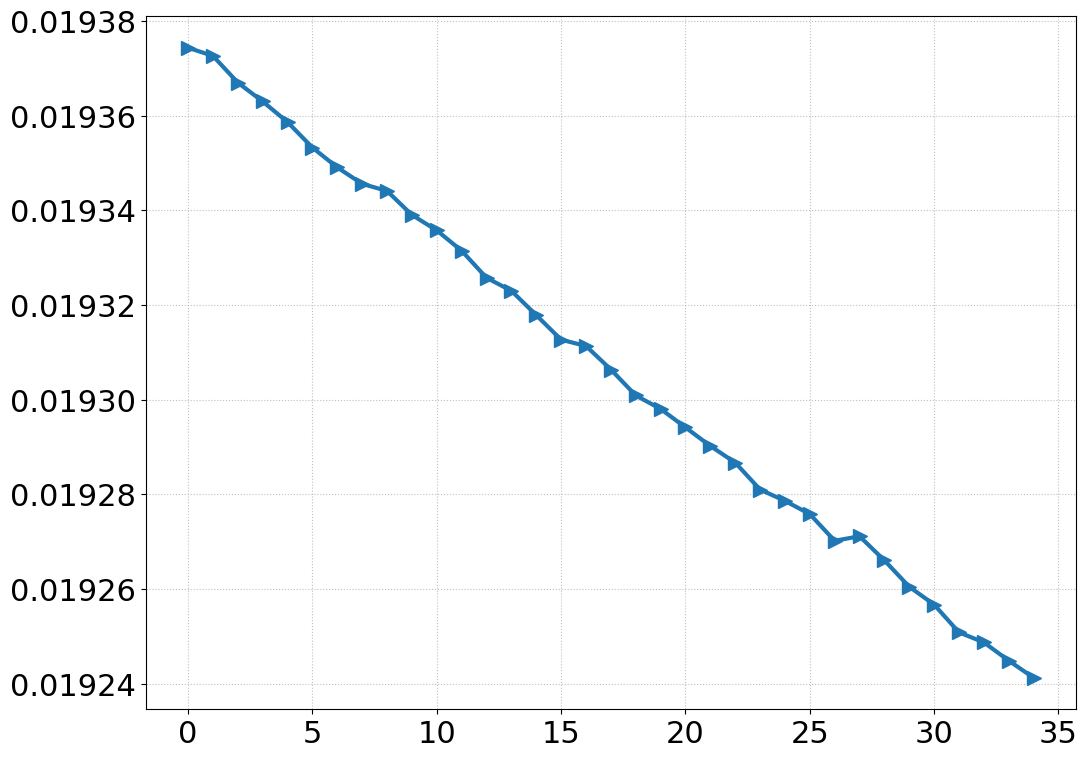

In [31]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [32]:
lr = 1e-6
learn.fit(35, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.019636,0.019235,00:28
1,0.019487,0.019230,00:29
2,0.018920,0.019228,00:29
3,0.019701,0.019229,00:28
4,0.019097,0.019220,00:30
5,0.018606,0.019216,00:38
6,0.019367,0.019212,00:34
7,0.018783,0.019209,00:36
8,0.018245,0.019209,00:34
9,0.019133,0.019204,00:30


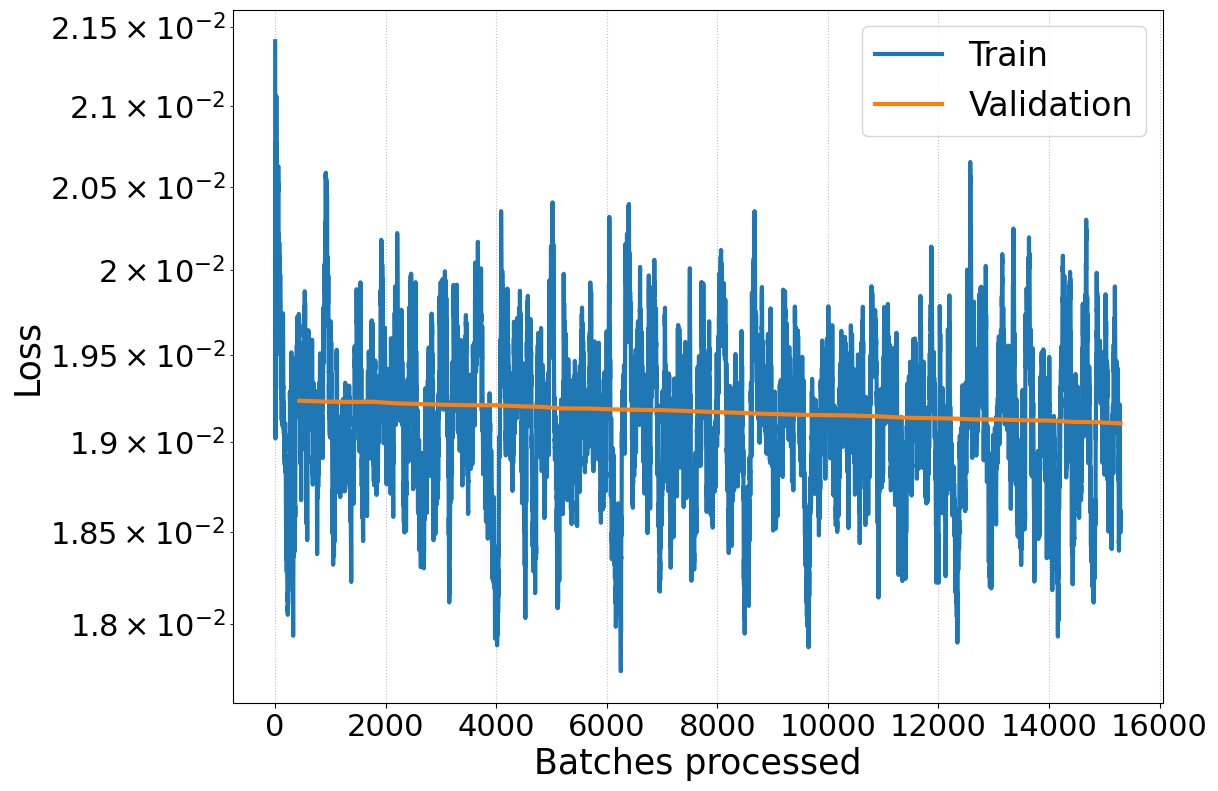

In [33]:
learn.recorder.plot_losses()
plt.yscale('log')

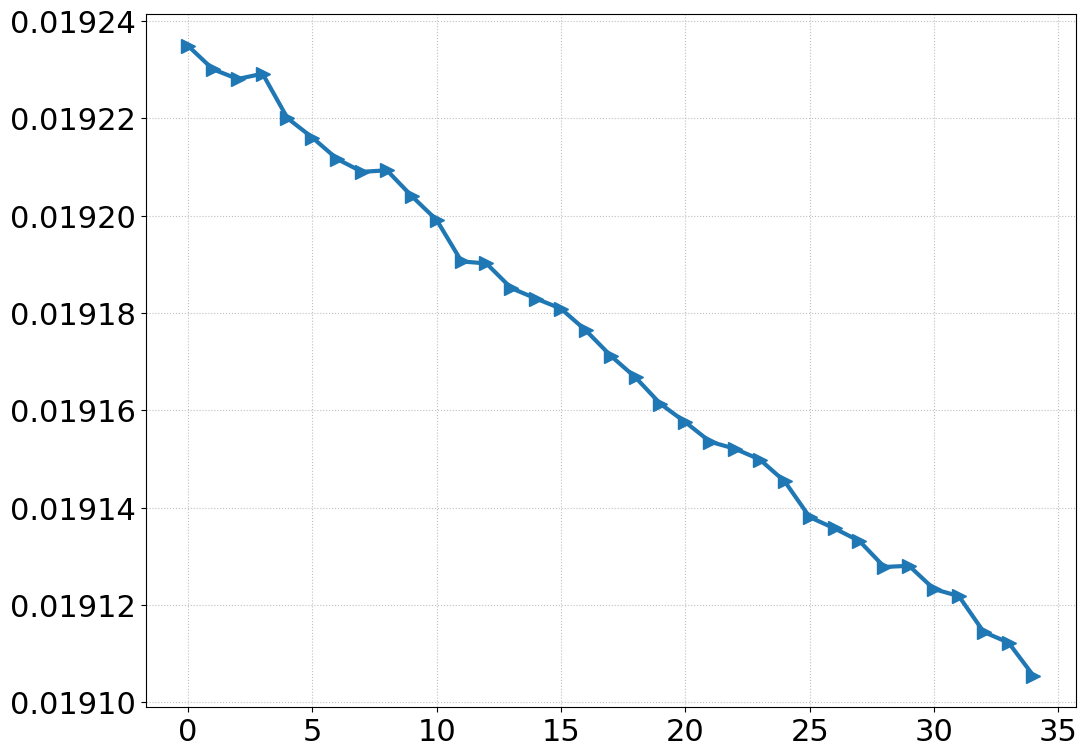

In [34]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [35]:
lr = 1e-6
learn.fit(35, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.018661,0.019103,00:30
1,0.019563,0.019099,00:29
2,0.018751,0.019095,00:30
3,0.019084,0.019095,00:31
4,0.018878,0.019091,00:31
5,0.019138,0.019085,00:31
6,0.019643,0.019080,00:32
7,0.019261,0.019076,00:30
8,0.019058,0.019075,00:30
9,0.019786,0.019070,00:30


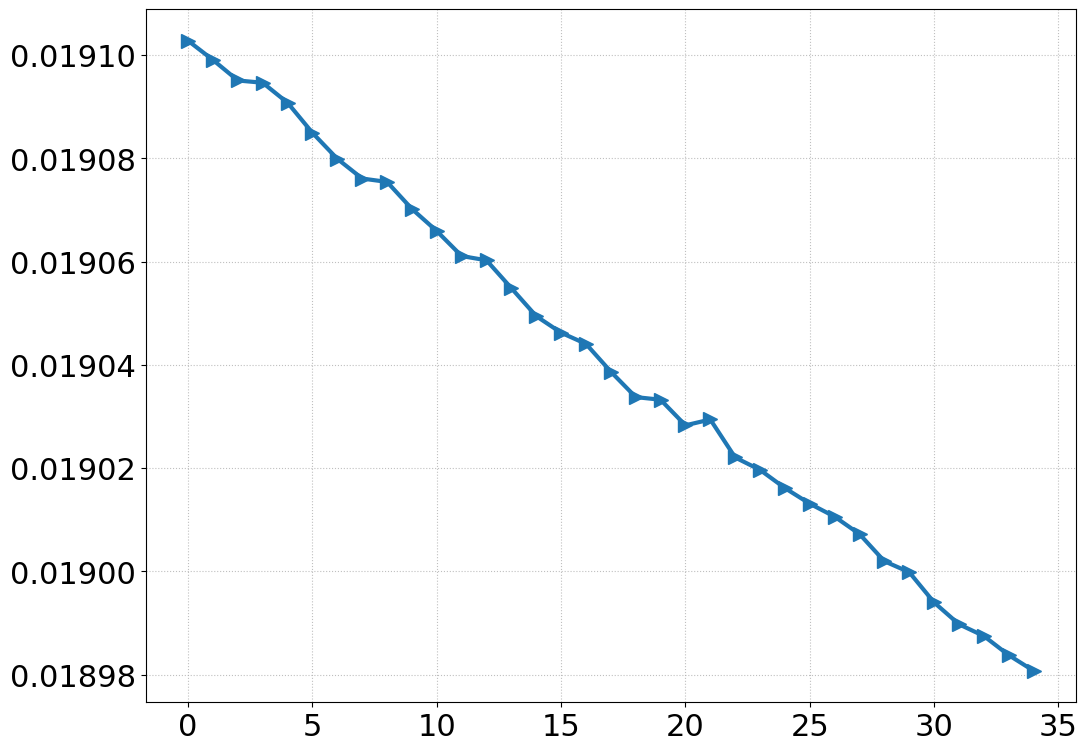

In [36]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [37]:
lr = 1e-6
learn.fit(35, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.018973,0.018976,00:31
1,0.018604,0.018974,00:30
2,0.018708,0.018969,00:30
3,0.019193,0.018965,00:31
4,0.018167,0.018962,00:29
5,0.019099,0.018958,00:30
6,0.018643,0.018955,00:30
7,0.018535,0.018951,00:30
8,0.018590,0.018946,00:30
9,0.019266,0.018944,00:37


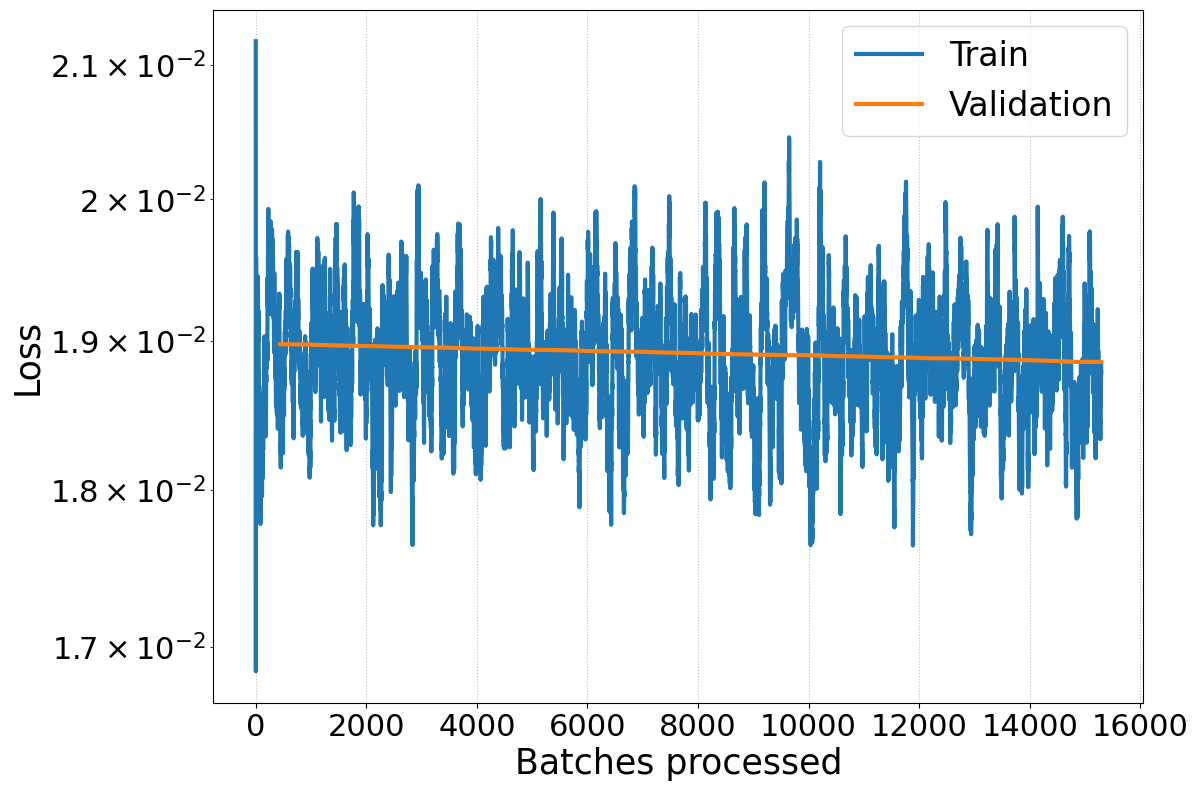

In [38]:
learn.recorder.plot_losses()
plt.yscale('log')

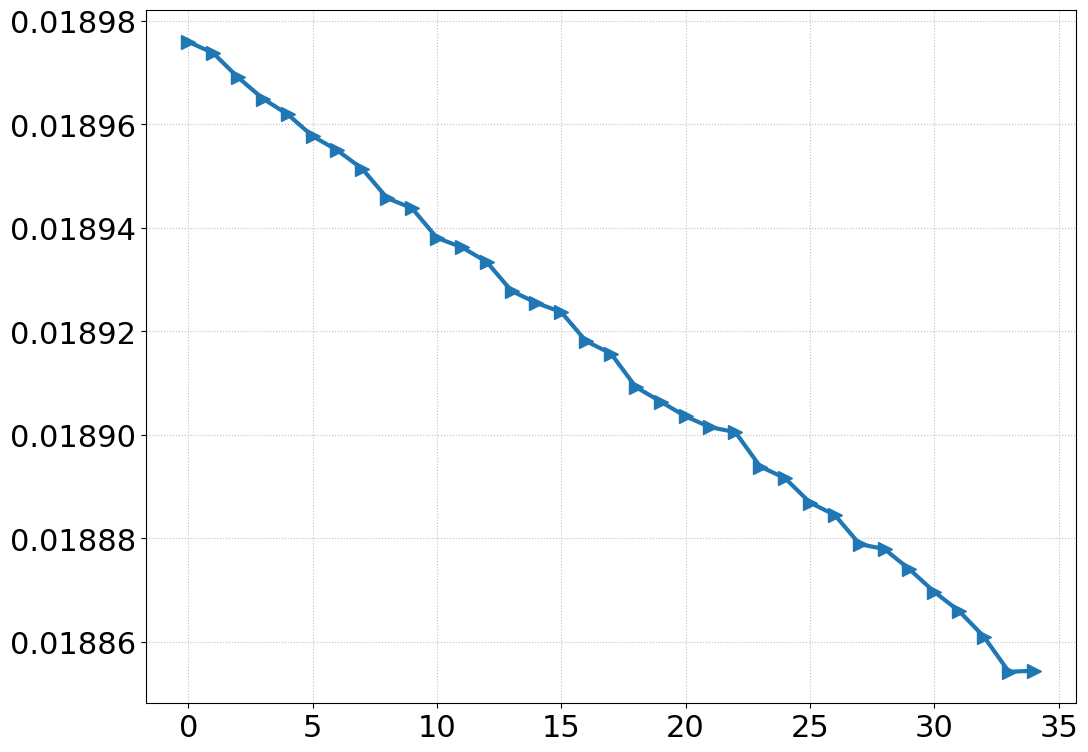

In [39]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [41]:
learn.save('my_AE_3D_200_no1cycle_trainforever')
learn.load('my_AE_3D_200_no1cycle_trainforever')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f16efffdf60>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f16efffdfd0>;

Test: None, model=AE_3D_200_leaky(
  (en1): Linear(in_features=4, out_features=200, bias=True)
  (en2): Linear(in_features=200, out_features=100, bias=True)
  (en3): Linear(in_features=100, out_features=50, bias=True)
  (en4): Linear(in_features=50, out_features=3, bias=True)
  (de1): Linear(in_features=3, out_features=50, bias=True)
  (de2): Linear(in_features=50, out_features=100, bias=True)
  (de3): Linear(in_features=100, out_features=200, bias=True)
  (de4): Linear(in_features=200, out_features=4, bias=True)
  (tanh): Tanh()
  (leakyReLU): LeakyReLU(negative_slope=0.02)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=MSELoss(), metrics=[], true_wd=True, bn_wd=False, wd=1e-06, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<c

In [42]:
lr = 3e-6
learn.fit(35, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.018264,0.018854,00:31
1,0.019085,0.018838,00:36
2,0.019280,0.018841,00:32
3,0.018587,0.018811,00:32
4,0.019489,0.018811,00:33
5,0.018754,0.018796,00:32
6,0.019024,0.018803,00:33
7,0.018785,0.018781,00:31
8,0.018752,0.018784,00:33
9,0.020107,0.018767,00:38


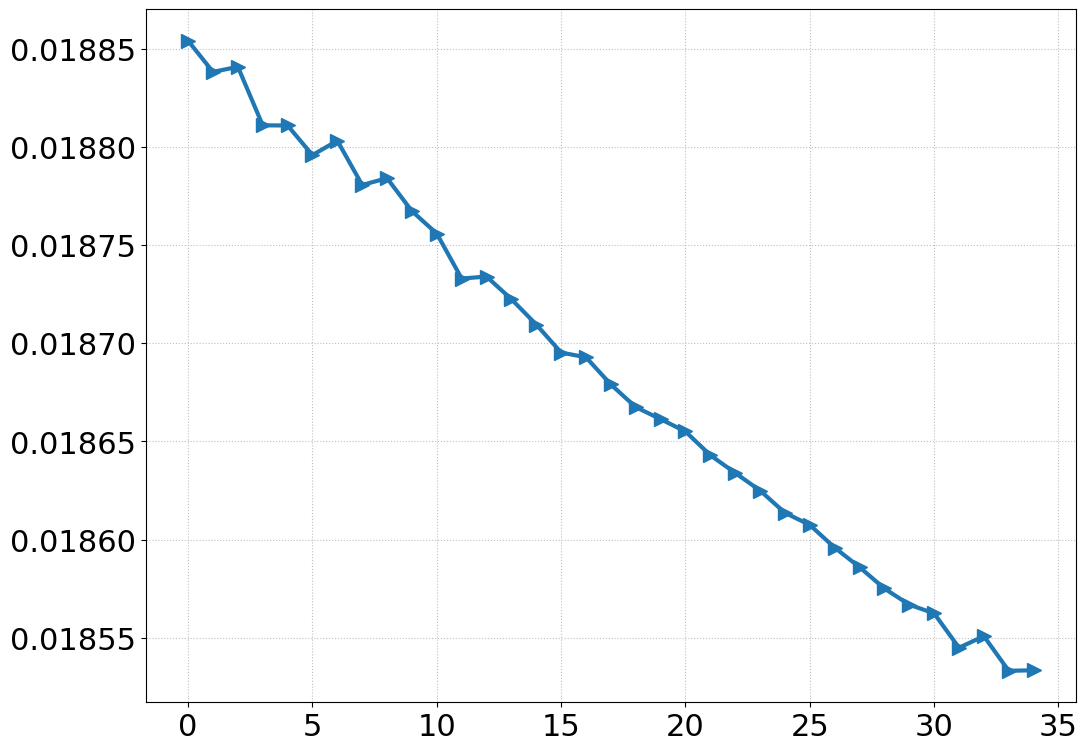

In [43]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [44]:
lr = 1e-6
learn.fit(35, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.019150,0.018517,01:01
1,0.018539,0.018511,01:01
2,0.017930,0.018507,01:00
3,0.018581,0.018507,01:02
4,0.018194,0.018505,01:00
5,0.018450,0.018500,01:02
6,0.018657,0.018496,01:01
7,0.018695,0.018494,01:02
8,0.019236,0.018493,01:07
9,0.018577,0.018489,01:02


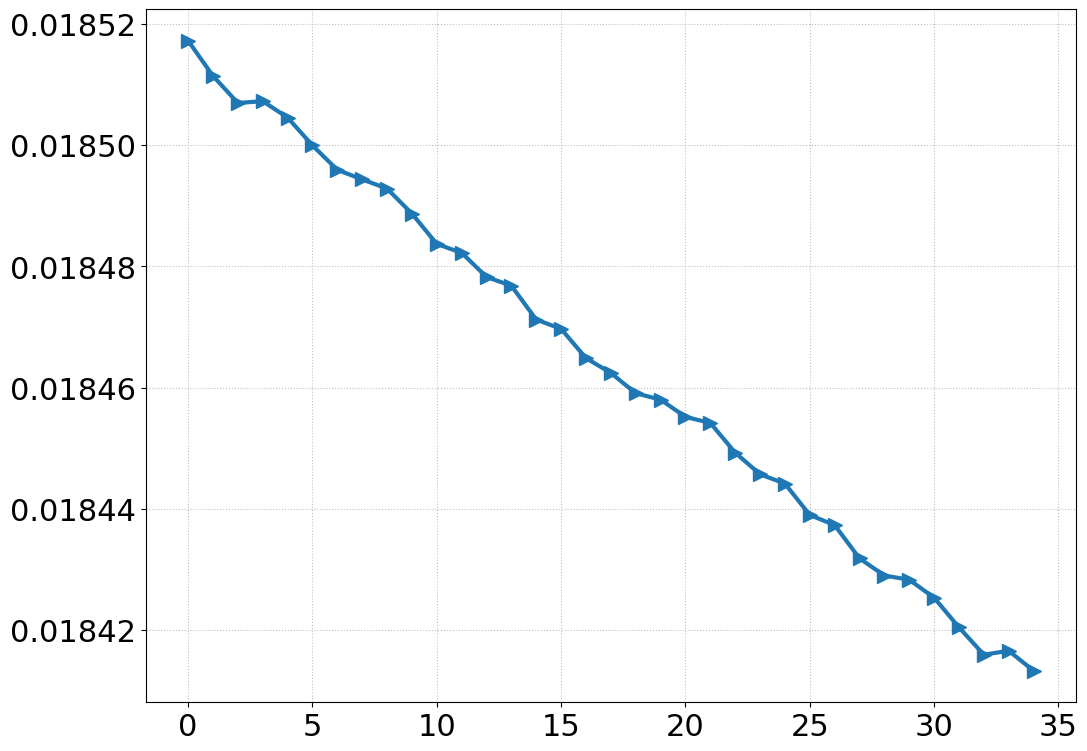

In [45]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [46]:
learn.save('my_AE_3D_200_no1cycle_trainforever')

In [47]:
learn.load('my_AE_3D_200_no1cycle_trainforever')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f16efffdf60>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f16efffdfd0>;

Test: None, model=AE_3D_200_leaky(
  (en1): Linear(in_features=4, out_features=200, bias=True)
  (en2): Linear(in_features=200, out_features=100, bias=True)
  (en3): Linear(in_features=100, out_features=50, bias=True)
  (en4): Linear(in_features=50, out_features=3, bias=True)
  (de1): Linear(in_features=3, out_features=50, bias=True)
  (de2): Linear(in_features=50, out_features=100, bias=True)
  (de3): Linear(in_features=100, out_features=200, bias=True)
  (de4): Linear(in_features=200, out_features=4, bias=True)
  (tanh): Tanh()
  (leakyReLU): LeakyReLU(negative_slope=0.02)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=MSELoss(), metrics=[], true_wd=True, bn_wd=False, wd=1e-06, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<c

In [53]:
curr_save_folder = 'trainforever_plots/'

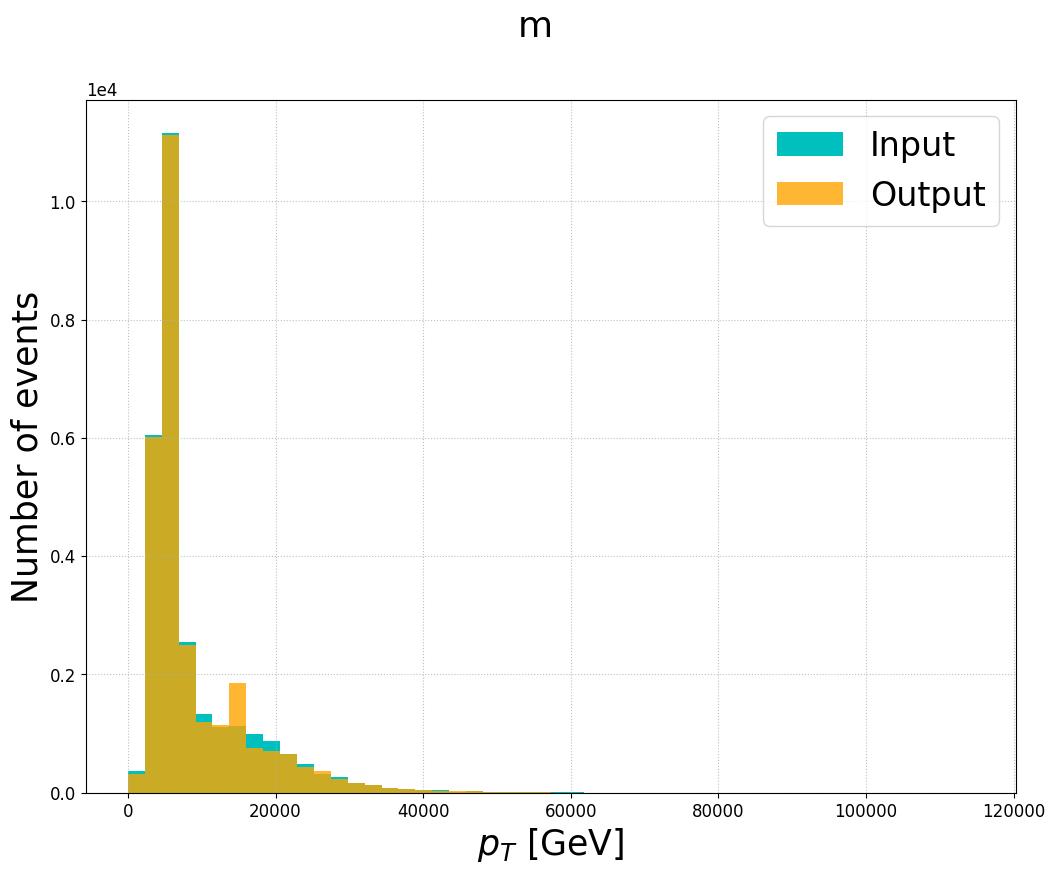

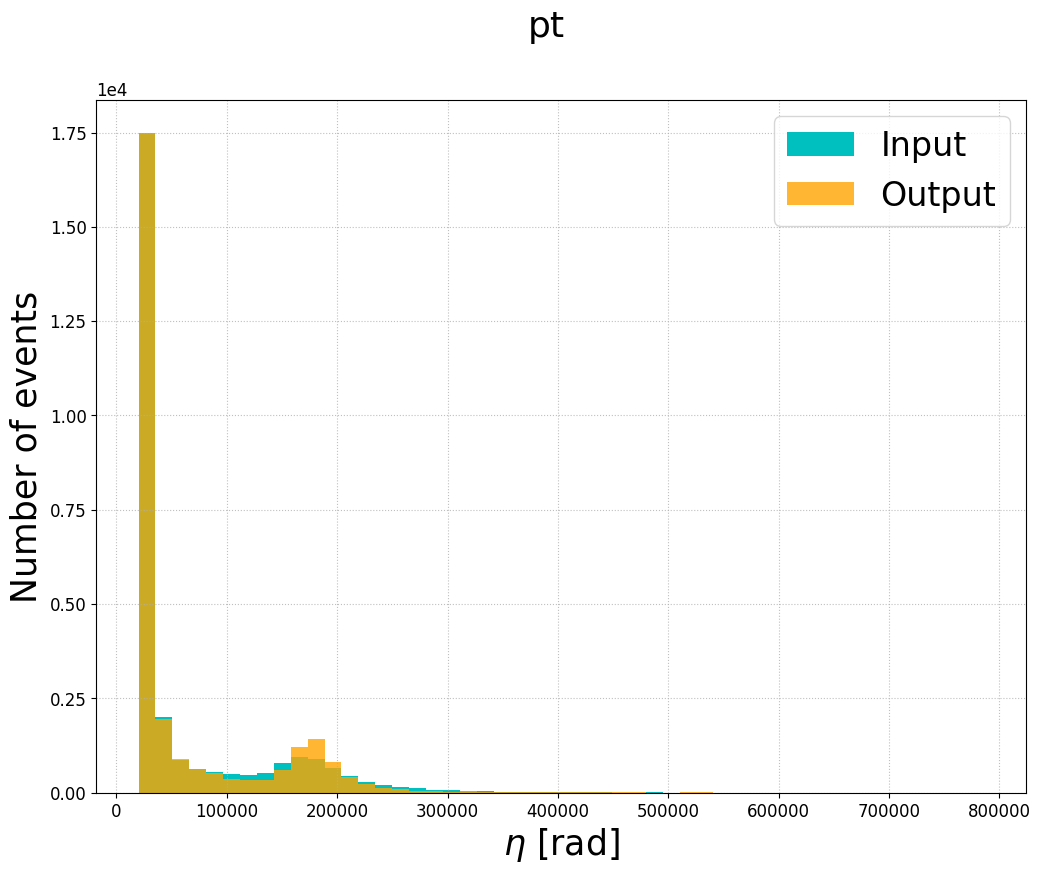

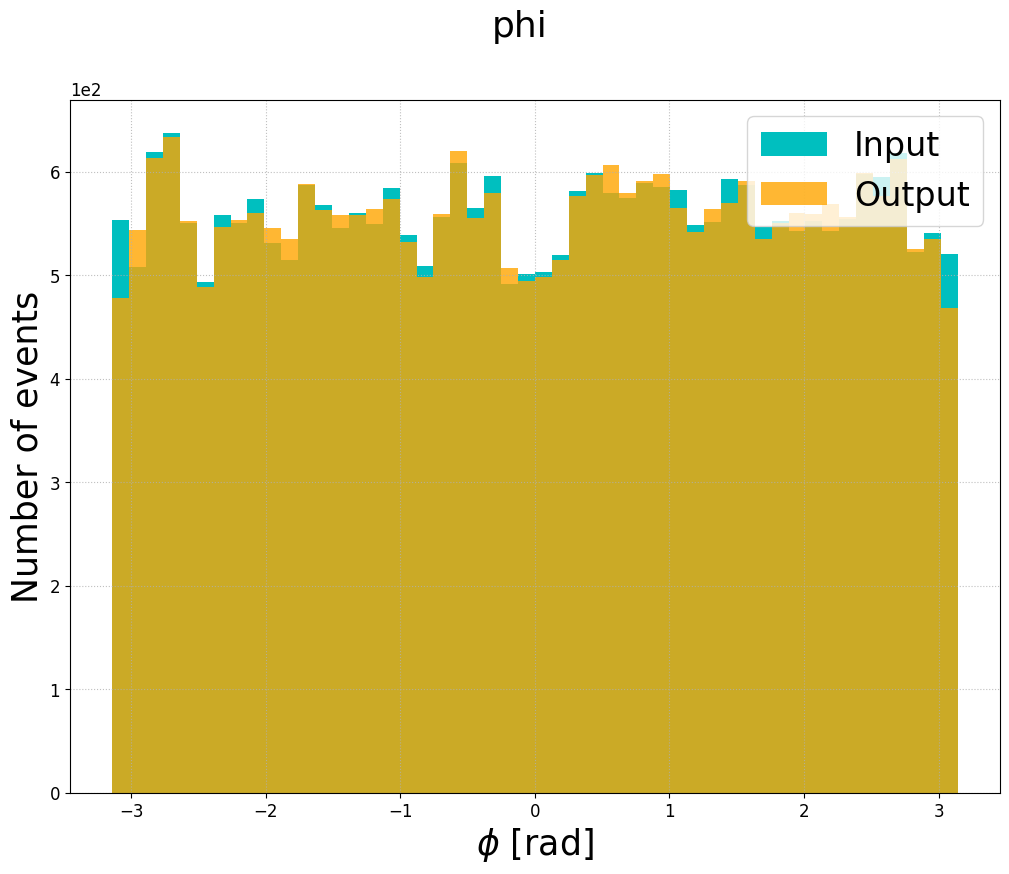

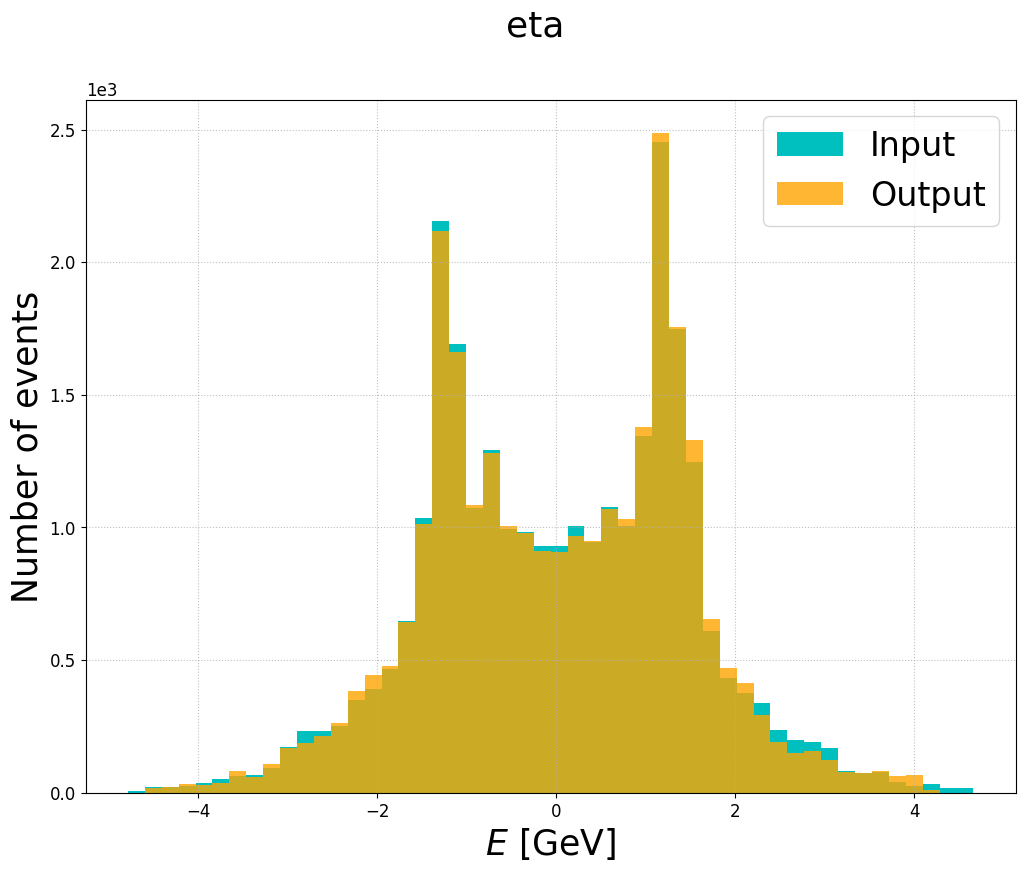

In [61]:
plt.close('all')
unit_list = ['[GeV]', '[rad]', '[rad]', '[GeV]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$E$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

model.to('cpu')

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = torch.tensor(test_x[idxs[0]:idxs[1]].values, dtype=torch.float)
pred = model(data).detach().numpy()
pred = np.multiply(pred, train_std.values)
pred = np.add(pred, train_mean.values)
data = np.multiply(data, train_std.values)
data = np.add(data, train_mean.values)

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure(kk + 4)
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(train_x.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    ms.sciy()
    # plt.yscale('log')
    plt.legend()
    fig_name = 'trainforever_hist_%s' % train.columns[kk]
    #plt.savefig(curr_save_folder + fig_name)

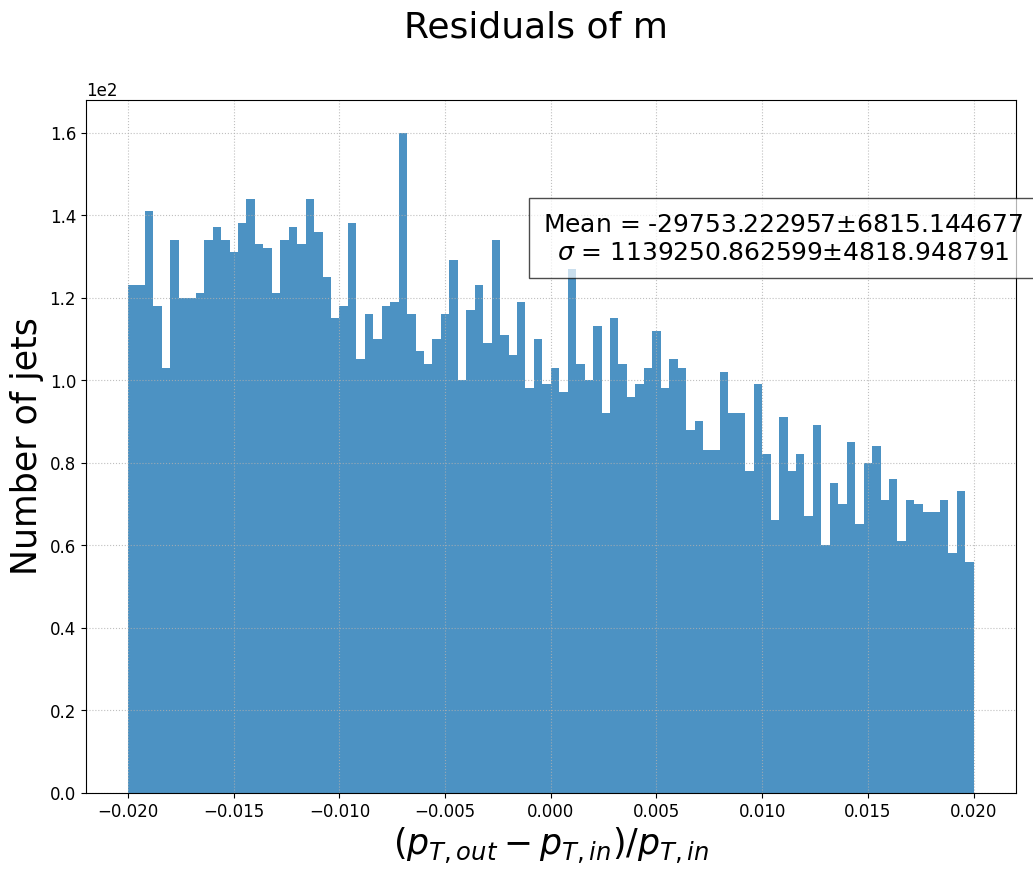

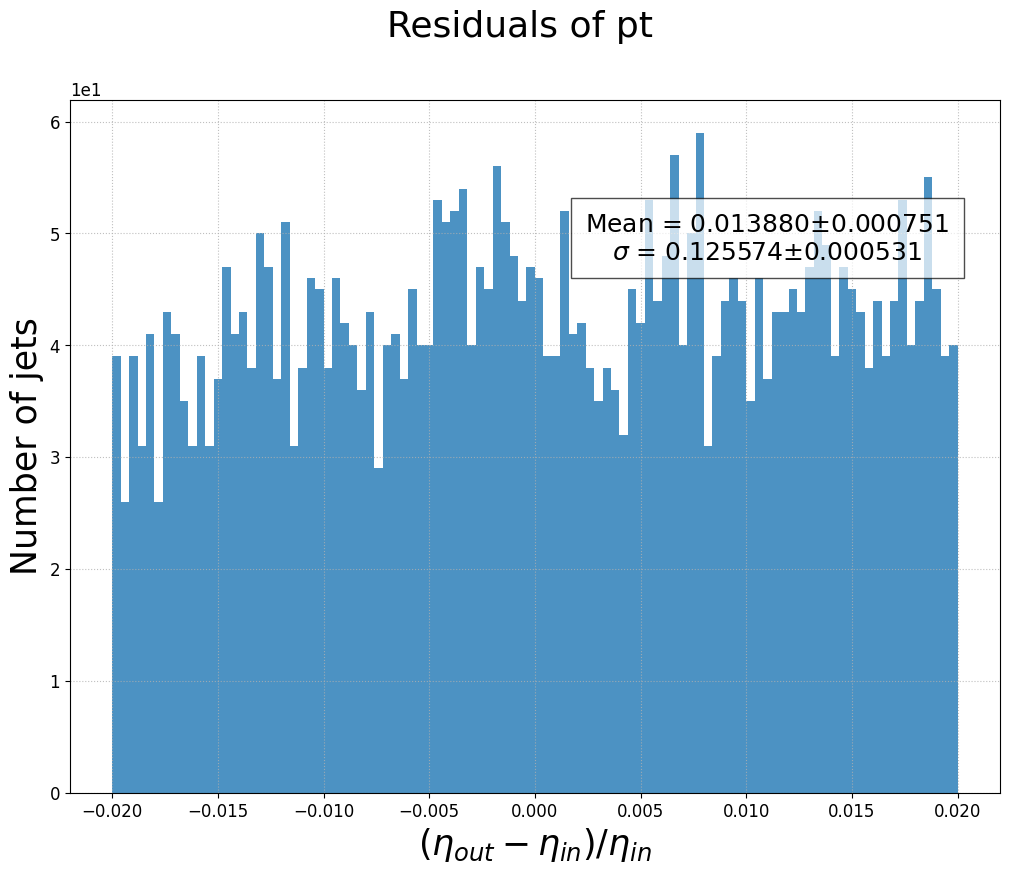

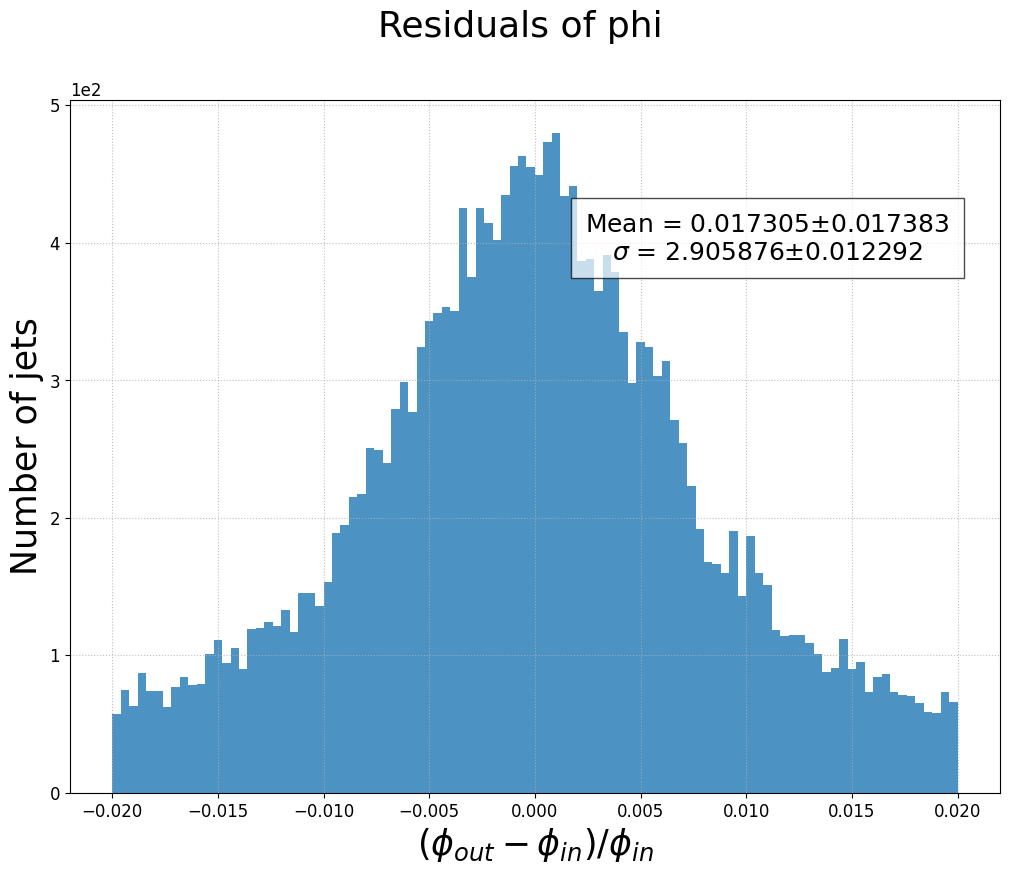

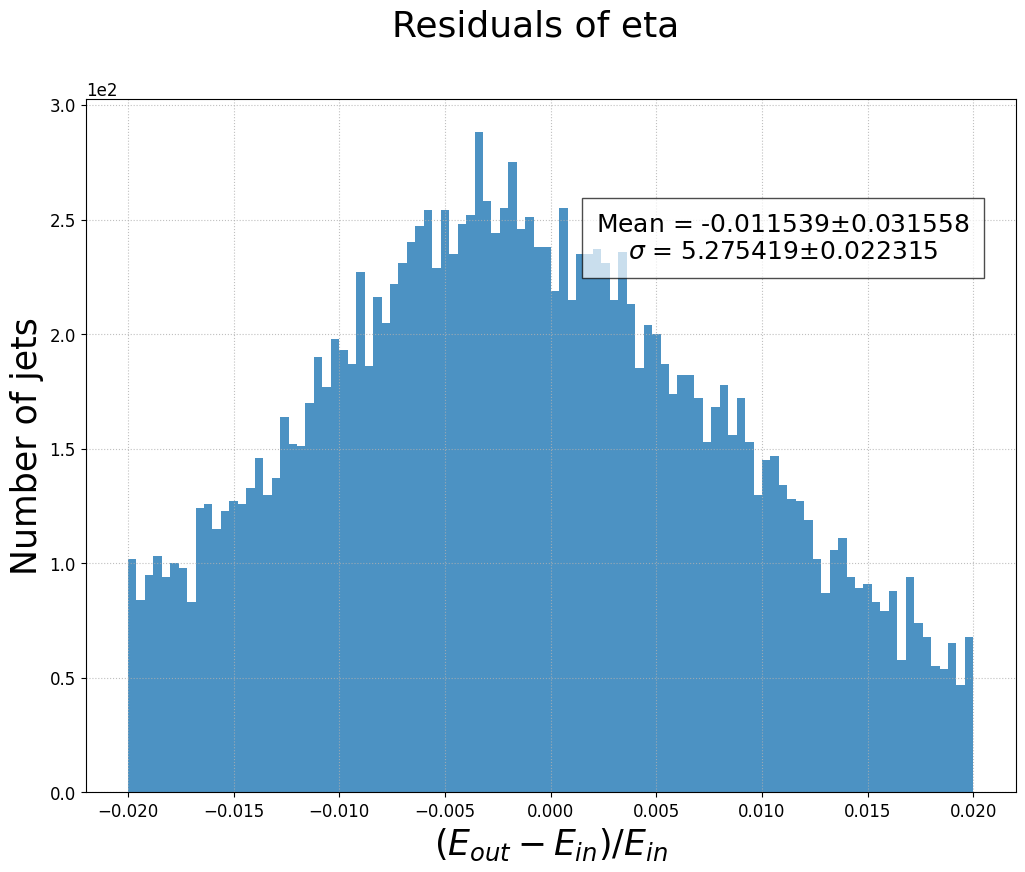

In [62]:
import utils
from scipy import stats
residual_strings = [r'$(p_{T,out} - p_{T,in}) / p_{T,in}$',
                        r'$(\eta_{out} - \eta_{in}) / \eta_{in}$',
                        r'$(\phi_{out} - \phi_{in}) / \phi_{in}$',
                        r'$(E_{out} - E_{in}) / E_{in}$']
residuals = (pred - data.detach().numpy()) / data.detach().numpy()
range = (-.02, .02)
#range=None
for kk in np.arange(4):
    plt.figure()
    n_hist_pred, bin_edges, _ = plt.hist(
        residuals[:, kk], label='Residuals', linestyle=line_style[0], alpha=alph, bins=100, range=range)
    plt.suptitle('Residuals of %s' % train.columns[kk])
    plt.xlabel(residual_strings[kk])  # (train.columns[kk], train.columns[kk], train.columns[kk]))
    plt.ylabel('Number of jets')
    ms.sciy()
    #plt.yscale('log')
    std = np.std(residuals[:, kk])
    std_err = utils.std_error(residuals[:, kk])
    mean = np.nanmean(residuals[:, kk])
    sem = stats.sem(residuals[:, kk], nan_policy='omit')
    ax = plt.gca()
    plt.text(.75, .8, 'Mean = %f$\pm$%f\n$\sigma$ = %f$\pm$%f' % (mean, sem, std, std_err), bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10},
             horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=18)
    fig_name = 'trainforever_residual_%s' % train.columns[kk]
    #plt.savefig(curr_save_folder + fig_name)

In [57]:
residuals[:,2].shape

(27945,)

In [58]:
test

,m,pt,phi,eta
85972,-0.533282,-0.581905,1.087244,-0.071133
38742,-0.472437,-0.609328,0.573286,0.476957
128711,-0.498829,-0.570312,-0.622658,0.542203
28751,0.697978,1.984290,0.178861,-1.805121
131358,-0.754120,-0.566174,0.218307,0.964189
...,...,...,...,...
133326,3.085881,2.459298,-1.655004,0.058346
12875,-0.418174,-0.539298,-0.443004,0.689991
111439,-0.551680,-0.561699,-1.210693,-1.605103
18479,-0.176735,-0.392414,-1.482100,-0.603219


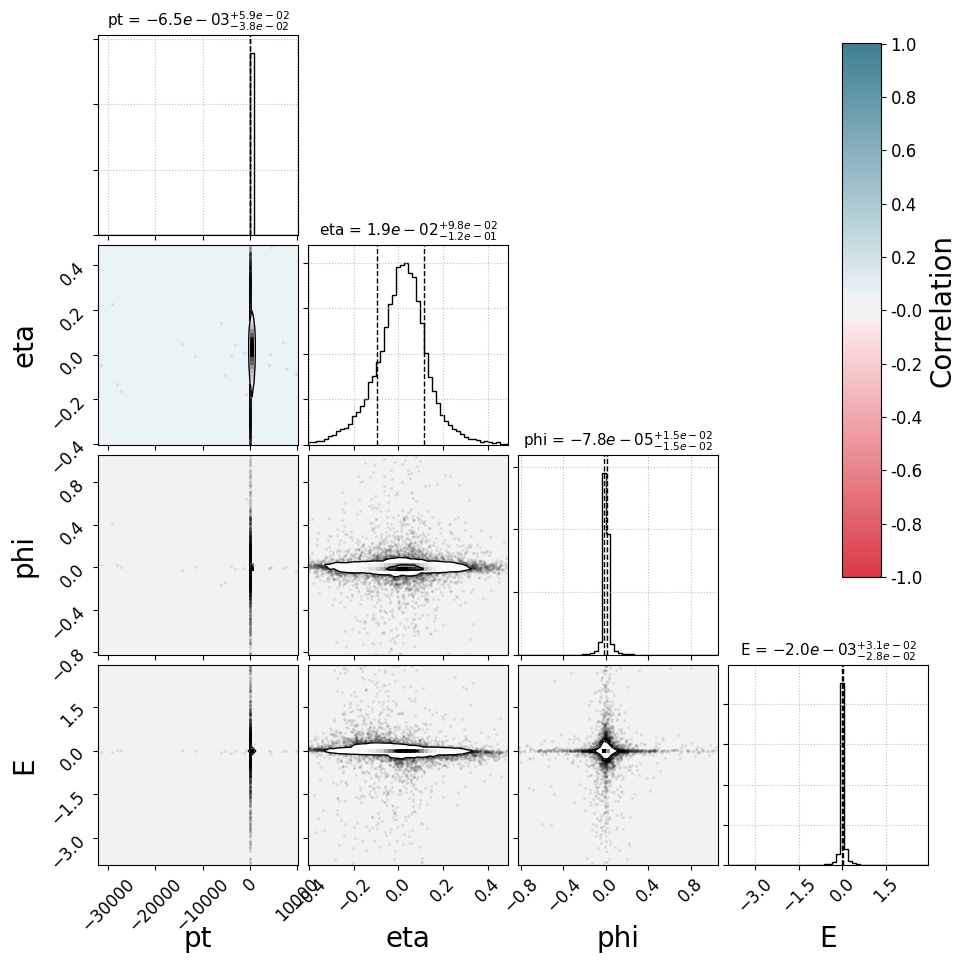

In [59]:
import corner.corner as corner
import seaborn as sns

res_df = pd.DataFrame({'pt': residuals[:, 0], 'eta': residuals[:, 1], 'phi': residuals[:, 2], 'E': residuals[:, 3]})
save = False

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
#cmap = 'RdBu'
norm = mpl.colors.Normalize(vmin=-1, vmax=1, clip=False)
mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

group = ['pt', 'eta', 'phi', 'E']

label_kwargs = {'fontsize': 20}
title_kwargs = {"fontsize": 11}
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
group_arr = res_df.values
corr = res_df.corr()
qs = np.quantile(group_arr, q=[.0025, .9975], axis=0)
ndim = qs.shape[1]
ranges = [tuple(qs[:, kk]) for kk in np.arange(ndim)]
figure = corner(group_arr, range=ranges, plot_density=True, plot_contours=True, no_fill_contours=False, #range=[range for i in np.arange(ndim)],
                bins=50, labels=group, label_kwargs=label_kwargs, #truths=[0 for kk in np.arange(qs.shape[1])],
                show_titles=True, title_kwargs=title_kwargs, quantiles=(0.16, 0.84),
                # levels=(1 - np.exp(-0.5), .90), fill_contours=False, title_fmt='.2e')
                levels=(1 - np.exp(-0.5), .90), fill_contours=False, title_fmt='.1e')

# # Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))
# Loop over the diagonal
linecol = 'r'
linstyl = 'dashed'
# Loop over the histograms
for yi in np.arange(ndim):
    for xi in np.arange(yi):
        ax = axes[yi, xi]
        # Set face color according to correlation
        ax.set_facecolor(color=mappable.to_rgba(corr.values[yi, xi]))
cax = figure.add_axes([.87, .4, .04, 0.55])
cbar = plt.colorbar(mappable, cax=cax, format='%.1f', ticks=np.arange(-1., 1.1, 0.2))
cbar.ax.set_ylabel('Correlation', fontsize=20)

if save:
    fig_name = 'corner_3d.png'
    plt.savefig(curr_save_folder + fig_name)